# Data Import & Exploration & Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
import os


db = mysql.connector.connect(host = "localhost",
                            username = "codebind",
                            password = "58623",
                            database = "mydb1")

cur = db.cursor()
 
data_path = r"C:\e-Commerce (Target) Sales\Dataset"


In [ ]:
customers = pd.read_csv(os.path.join(data_path, "customers.csv"))
geolocation = pd.read_csv(os.path.join(data_path, "geolocation.csv"))
order_items = pd.read_csv(os.path.join(data_path, "order_items.csv"))
orders = pd.read_csv(os.path.join(data_path, "cleaned_orders_null.csv"))
payments = pd.read_csv(os.path.join(data_path, "payments.csv"))
products = pd.read_csv(os.path.join(data_path, "cleaned_products.csv"))
sellers = pd.read_csv(os.path.join(data_path, "sellers.csv"))

customers.head(), geolocation.head(), order_items.head(), orders.head(), payments.head(), products.head(), sellers.head()

(                        customer_id                customer_unique_id  \
 0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
 4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
 
    customer_zip_code_prefix          customer_city customer_state  
 0                     14409                 franca             SP  
 1                      9790  sao bernardo do campo             SP  
 2                      1151              sao paulo             SP  
 3                      8775        mogi das cruzes             SP  
 4                     13056               campinas             SP  ,
    geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
 0                         1037       -23.545621       -46.639292   
 

In [ ]:
#  missing values and data types
datasets = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": order_items,
    "orders": orders,
    "payments": payments,
    "products": products,
    "sellers": sellers
}

for name, df in datasets.items():
    print(f"\n{name.upper()} Dataset Info:")
    print(df.info(), "\n")



CUSTOMERS Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 


GEOLOCATION Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  f

In [5]:
for name, df in datasets.items():
    print(f'\nMissing Values:')
    print(df.isnull().sum(), '\n')


Missing Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 


Missing Values:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 


Missing Values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 


Missing Values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 


Missing Values:
order_id                0
payment_sequential      0
payment_t

In [ ]:

for name, df in datasets.items():
    duplicates = df.duplicated().sum()
    print(f"{name.upper()} - Duplicates: {duplicates}")



CUSTOMERS - Duplicates: 0
GEOLOCATION - Duplicates: 261831
ORDER_ITEMS - Duplicates: 0
ORDERS - Duplicates: 0
PAYMENTS - Duplicates: 0
PRODUCTS - Duplicates: 0
SELLERS - Duplicates: 0


# EDA

In [5]:

print("Total Number of Orders:", orders["order_id"].nunique())
print("Total Number of Unique Customers:", customers["customer_unique_id"].nunique())
print("Total Number of Products:", products["product_id"].nunique())
print("Total Number of Sellers:", sellers["seller_id"].nunique())


Total Number of Orders: 99441
Total Number of Unique Customers: 96096
Total Number of Products: 32951
Total Number of Sellers: 3095


In [6]:
import mysql.connector

# Connection to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='codebind',  
    password='58623',  
    database='mydb1'  
)


cursor = conn.cursor()

In [7]:
query = "SHOW TABLES;"
tables = pd.read_sql(query, conn)
print(tables)

  Tables_in_mydb1
0       customers
1     geolocation
2     order_items
3          orders
4        payments
5        products
6         sellers


C:\Users\Acer\AppData\Local\Temp\ipykernel_5364\1782116666.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql(query, conn)


In [8]:

products = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 9.2/Uploads/products.csv')

numeric_cols = [
    'product_name_length', 'product_description_length', 
    'product_photos_qty', 'product_weight_g', 
    'product_length_cm', 'product_height_cm', 'product_width_cm'
]
products[numeric_cols] = products[numeric_cols].fillna(0)

products['product category'] = products['product category'].fillna('Unknown')

products.to_csv('C:/ProgramData/MySQL/MySQL Server 9.2/Uploads/cleaned_products.csv', index=False)







In [9]:


orders = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 9.2/Uploads/orders.csv')

date_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
             'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_cols:
    orders[col] = orders[col].replace('', np.nan).fillna(np.nan)

orders.to_csv('C:/ProgramData/MySQL/MySQL Server 9.2/Uploads/cleaned_orders_null.csv', index=False, na_rep='NULL')



## Entity-Relaionship Diagram

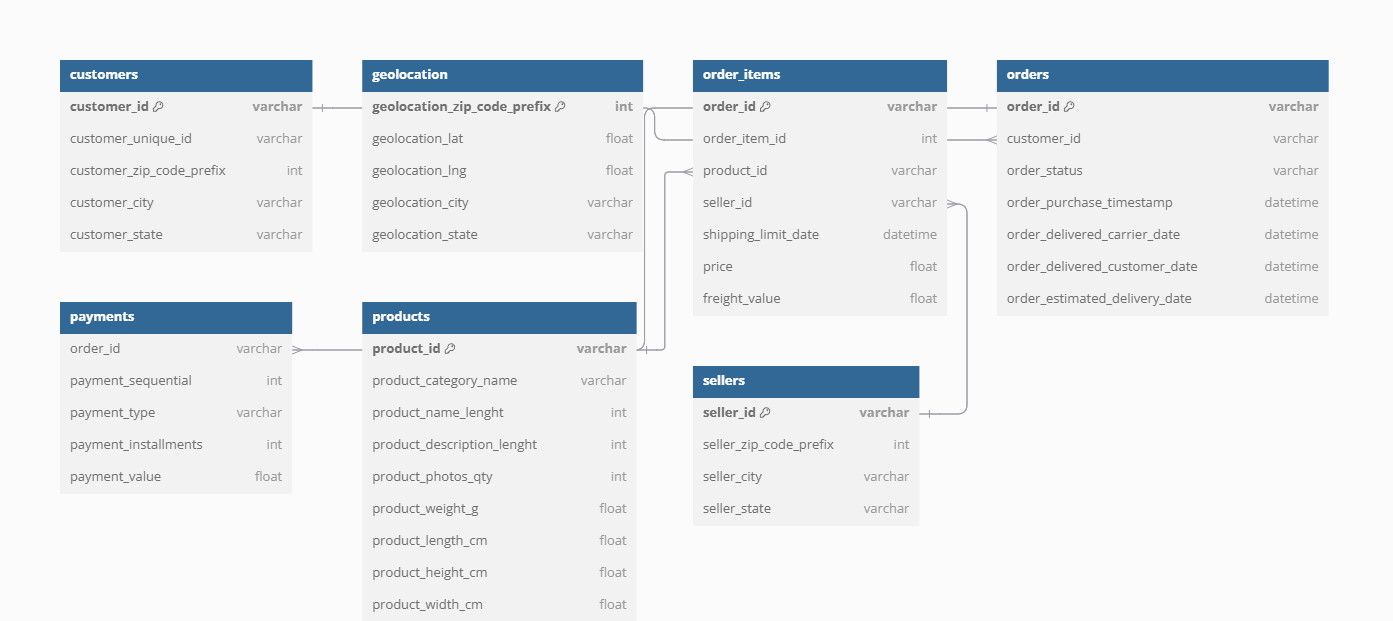

In [10]:


from IPython.display import Image
Image(filename="C:/Users/Acer/OneDrive/Зображення/ERD_e-Comm(target).png")

# The number of orders placed in each year

In [11]:
query = '''
SELECT COUNT(order_id) AS number_of_orders, YEAR(order_purchase_timestamp) AS year
FROM orders
GROUP BY year
'''
count_orders = pd.read_sql(query, conn)
count_orders


C:\Users\Acer\AppData\Local\Temp\ipykernel_5364\2785870460.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  count_orders = pd.read_sql(query, conn)


,number_of_orders,year
0,45101,2017
1,54011,2018
2,329,2016


# Total sales per category

In [12]:
query = """ SELECT products.product_category_name AS category, SUM(payments.payment_value) AS sales
FROM products 
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY category
ORDER BY sales DESC
"""

category_sales = pd.read_sql(query, conn)
category_sales.to_csv('category_sales.csv', index=False)


C:\Users\Acer\AppData\Local\Temp\ipykernel_5364\23062457.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_sales = pd.read_sql(query, conn)


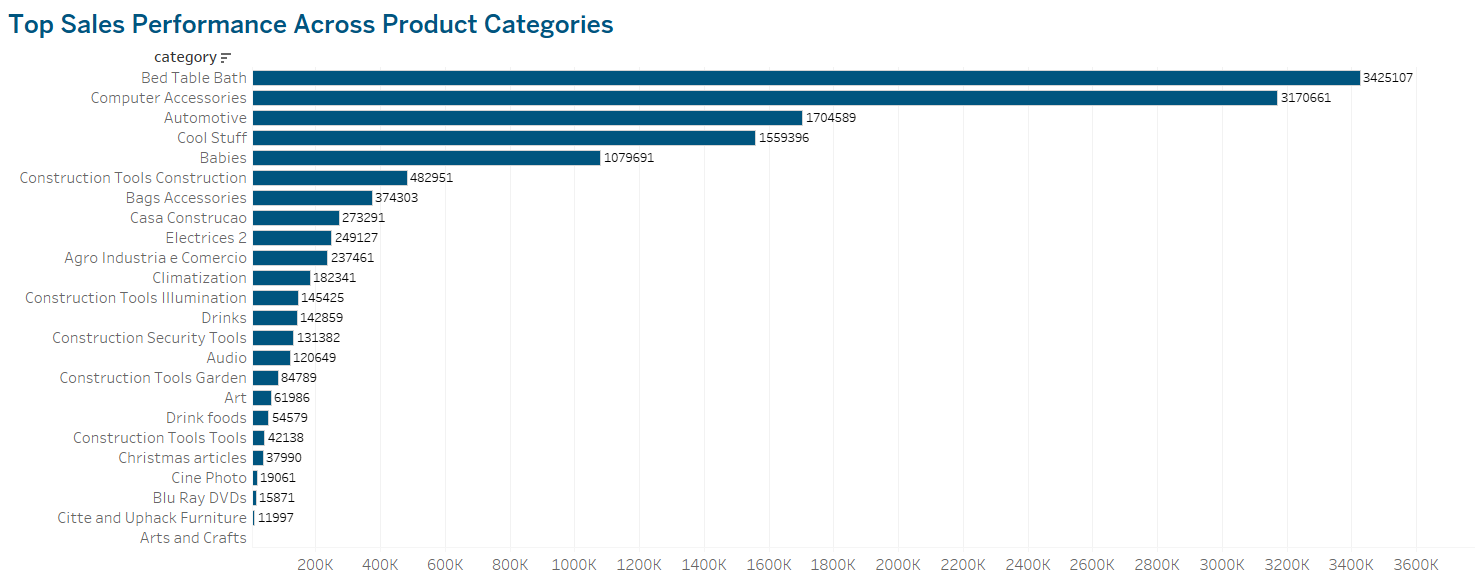

In [13]:

Image(filename="C:/Users/Acer/OneDrive/Зображення/top_sales_per_category.png")

# Identifing high-value customers
### *Who are the top customers by purchase amount in each year?*
*SQL based*

C:\Users\Acer\AppData\Local\Temp\ipykernel_5364\491658549.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


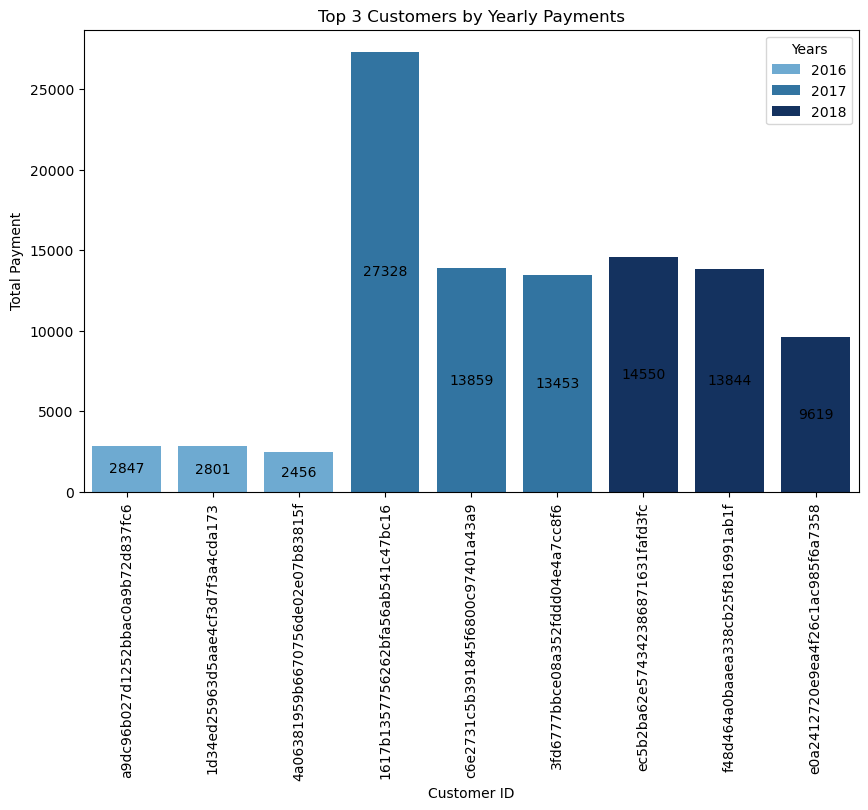

In [ ]:

query = """
SELECT years, customer_id, payment, d_rank
FROM
(
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        orders.customer_id,
        SUM(payments.payment_value) AS payment,
        DENSE_RANK() OVER (PARTITION BY YEAR(orders.order_purchase_timestamp)
                           ORDER BY SUM(payments.payment_value) DESC) AS d_rank
    FROM orders 
    JOIN payments ON payments.order_id = orders.order_id
    GROUP BY years, orders.customer_id
) AS a
WHERE d_rank <= 3;
"""

df = pd.read_sql(query, conn) 

custom_palette = ["#5DADE2", "#1F77B4", "#08306B"]  # Light to dark blue shades

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="customer_id", y="payment", data=df, hue="years", palette=custom_palette)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=10)

plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel("Customer ID")
plt.ylabel("Total Payment")
plt.title("Top 3 Customers by Yearly Payments")
plt.legend(title="Years")

plt.show()




# States Per Year Based on Total Payments
*SQL based*

In [15]:
query = """
WITH state_spending AS (
    SELECT 
        c.customer_state,
        YEAR(o.order_purchase_timestamp) AS year,
        SUM(p.payment_value) AS total_spent
    FROM orders o
    JOIN payments p ON o.order_id = p.order_id
    JOIN customers c ON o.customer_id = c.customer_id
    GROUP BY c.customer_state, year
),
ranked_state_spending AS (
    SELECT 
        customer_state,
        year,
        total_spent,
        RANK() OVER (PARTITION BY year ORDER BY total_spent DESC) AS state_rank
    FROM state_spending
)
SELECT * 
FROM ranked_state_spending
WHERE state_rank <= 5
ORDER BY year, state_rank;
"""

state_spending_df = pd.read_sql(query, conn)
state_spending_df.head(30)


C:\Users\Acer\AppData\Local\Temp\ipykernel_5364\2241314720.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  state_spending_df = pd.read_sql(query, conn)


,customer_state,year,total_spent,state_rank
0,SP,2016,3.377108e+04,1
1,RJ,2016,2.681516e+04,2
2,MG,2016,1.128594e+04,3
3,RS,2016,9.581400e+03,4
4,SC,2016,5.460840e+03,5
5,SP,2017,5.123726e+06,1
6,RJ,2017,2.111909e+06,2
7,MG,2017,1.709783e+06,3
8,RS,2017,8.493866e+05,4
9,PR,2017,7.075645e+05,5


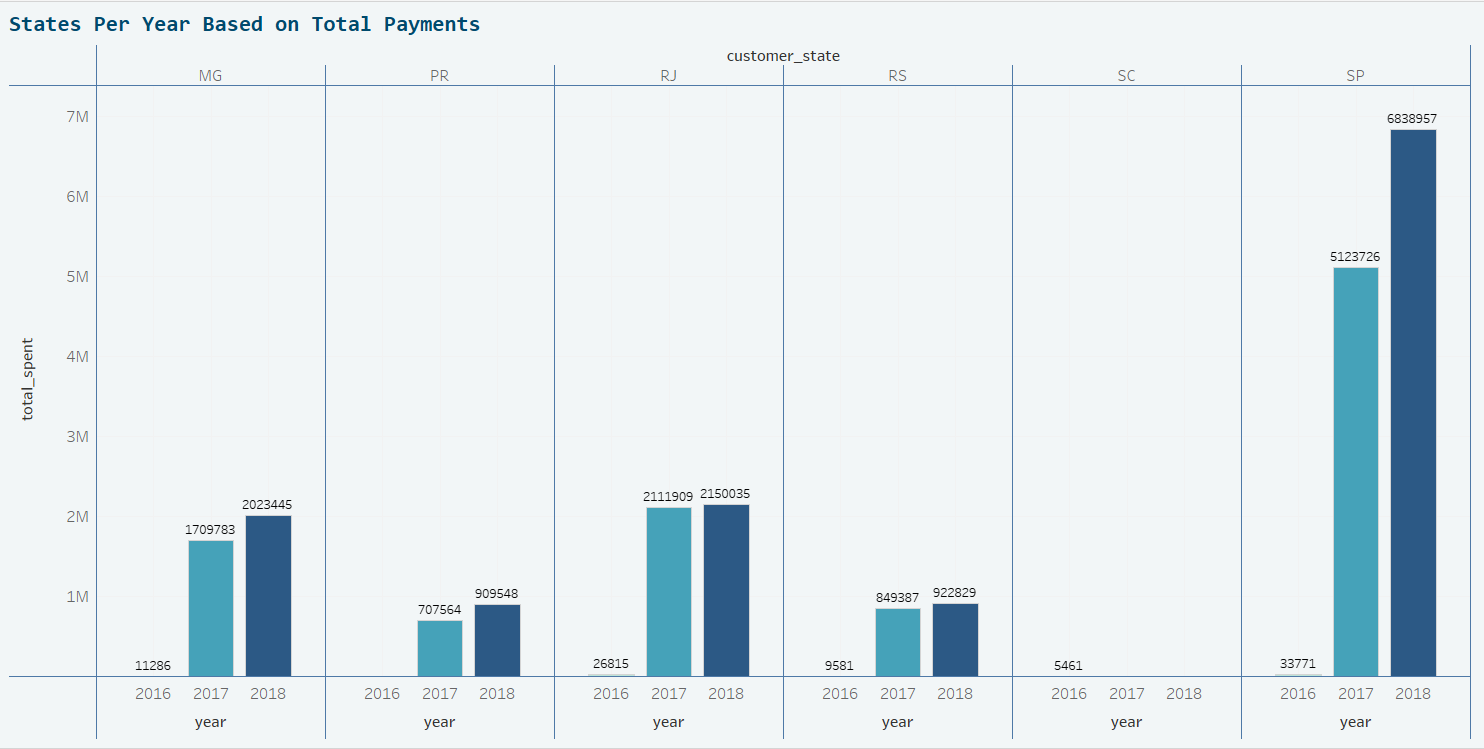

In [16]:
from IPython.display import Image
Image(filename="C:/Users/Acer/OneDrive/Зображення/Sales_per_Year_Based_on_Totat_Payments.png")

# New vs. Returning Customers

In [17]:
query = """
SELECT 
    CASE 
        WHEN order_count = 1 THEN 'One-Time Buyer'
        ELSE 'Retained Customer'
    END AS customer_type,
    COUNT(customer_unique_id) AS customer_count,
    SUM(total_payment) AS total_revenue,
    AVG(order_count) AS avg_orders_per_customer
FROM (
    SELECT 
        customers.customer_unique_id,
        COUNT(DISTINCT orders.order_id) AS order_count,
        SUM(payments.payment_value) AS total_payment
    FROM customers
    JOIN orders ON customers.customer_id = orders.customer_id
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY customers.customer_unique_id
) AS customer_summary
GROUP BY customer_type;
"""

rev_contribution_df = pd.read_sql(query, conn)
rev_contribution_df



C:\Users\Acer\AppData\Local\Temp\ipykernel_5364\1585877409.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rev_contribution_df = pd.read_sql(query, conn)


,customer_type,customer_count,total_revenue,avg_orders_per_customer
0,One-Time Buyer,93098,3.012970e+07,1.0000
1,Retained Customer,2997,1.888045e+06,2.1161


# Comparing order volume by month/quarter

In [24]:
# Execute the SQL query
query = """
SELECT 
    YEAR(orders.order_purchase_timestamp) AS year,
    MONTHNAME(orders.order_purchase_timestamp) AS month,
    EXTRACT(MONTH FROM orders.order_purchase_timestamp) AS month_number,
    QUARTER(orders.order_purchase_timestamp) AS quarter,
    COUNT(orders.order_id) AS total_orders
FROM 
    orders
GROUP BY 
    year, month, month_number, quarter
ORDER BY 
    year, month_number;
"""
order_volume = pd.read_sql(query, conn)
order_volume




C:\Users\Acer\AppData\Local\Temp\ipykernel_5364\2719187776.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_volume = pd.read_sql(query, conn)


,year,month,month_number,quarter,total_orders
0,2016,September,9,3,4
1,2016,October,10,4,324
2,2016,December,12,4,1
3,2017,January,1,1,800
4,2017,February,2,1,1780
5,2017,March,3,1,2682
6,2017,April,4,2,2404
7,2017,May,5,2,3700
8,2017,June,6,2,3245
9,2017,July,7,3,4026


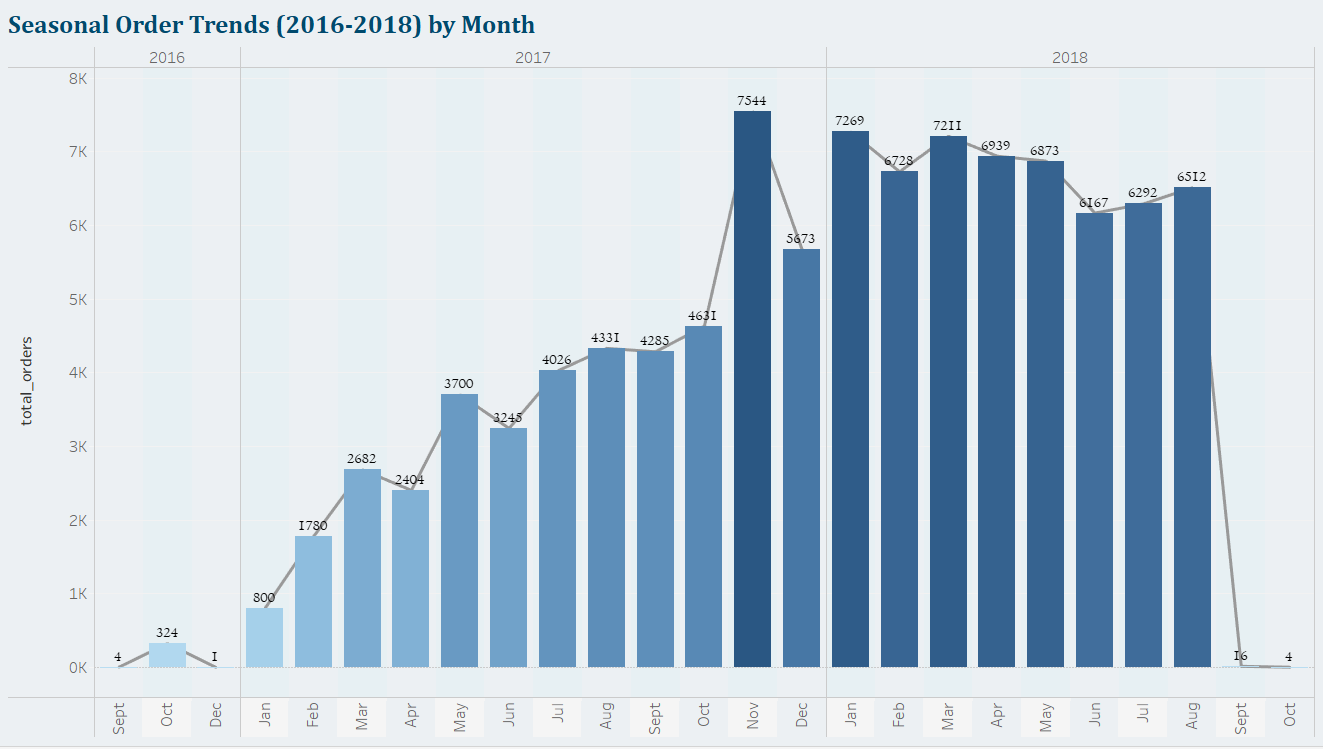

In [25]:

Image(filename="C:/Users/Acer/OneDrive/Зображення/Seasonal_order_trends.png")

